In [1]:
import numpy as np
import random
import sympy as sp
import pandas as pd

In [2]:
s=pd.read_csv("C:\\Users\\vigne\\Desktop\\test-data.csv")

In [3]:
s.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [4]:
df=s[['Kilometers_Driven']]
df1=s[['Mileage','Engine']]
df1= df1[['Mileage','Engine']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df2=pd.concat([df,df1],axis=1, join='inner')
df2=pd.concat([df2,s[['Seats']]],axis=1, join='inner')
df2['Mileage'] = df2['Mileage'].astype(float)
df2['Engine'] = df2['Engine'].astype(float)
df2.head()

,Kilometers_Driven,Mileage,Engine,Seats
0,40929,32.26,998.0,4.0
1,54493,24.70,796.0,5.0
2,34000,13.68,2393.0,7.0
3,139000,23.59,1364.0,5.0
4,29000,18.50,1197.0,5.0


In [5]:
m=random.randint(0,1234)
n=random.randint(0,1234)
mylist=df2.values.tolist()
a=mylist[m]
A=np.array(a)
b=mylist[n]
B=np.array(b)
for i in range(0,len(a)):
    a[i]=float(a[i])
for i in range(0,len(b)):
    b[i]=float(b[i])
print(a)
print(b)
c=np.dot(a,b)
a_norm=np.linalg.norm(a)
b_norm=np.linalg.norm(b)
print(c)

[75000.0, 15.0, 1396.0, 5.0]
[62261.0, 17.92, 1086.0, 5.0]
4671091349.8


In [6]:
k=np.array([a,b])
print(k)
k_ech,inds = sp.Matrix(k.T).rref()  
print(inds)
print(k_ech)

[[7.5000e+04 1.5000e+01 1.3960e+03 5.0000e+00]
 [6.2261e+04 1.7920e+01 1.0860e+03 5.0000e+00]]
(0, 1)
Matrix([[1, 0], [0, 1], [0, 0], [0, 0]])


In [7]:
len(inds)

2

so the random selected vectors are dependent on each other.

In [8]:
cos=(np.dot(a,b))/(np.linalg.norm(a)*np.linalg.norm(b))
print(cos)

0.9999993113068392


In [9]:
proj_val=np.linalg.norm(b)*cos
print(proj_val)

62270.43056024824


In [10]:
D=np.matrix([cos])
D.shape

(1, 1)

In [11]:
B=np.matrix(b).T
B.shape

(4, 1)

In [12]:
proj=B.dot(D)
print(proj.T)
#projection vector

[[6.22609571e+04 1.79199877e+01 1.08599925e+03 4.99999656e+00]]


In [13]:
H2=B-proj
print(H2.T)

[[4.28787249e-02 1.23413814e-05 7.47920773e-04 3.44346580e-06]]


In [14]:
h2=np.array(H2)

In [15]:
vector1_h2_angle=np.dot(a,h2)
print(vector1_h2_angle)

[3216.94866643]


In [16]:
class1 = df2[df2["Kilometers_Driven"] <= 50000]
print(class1)
class2 = df2[df2["Kilometers_Driven"] >= 50001]
print(class2)
mean1 = list(np.mean(class1, axis=0))
M1=np.matrix(mean1)
print(mean1)
mean2 = list(np.mean(class2, axis=0))
print(mean2)
M2=np.matrix(mean2)
std1 = list(np.std(class1, axis=0))
print(std1)
std2 = list(np.std(class2, axis=0))
print(std2)

      Kilometers_Driven  Mileage  Engine  Seats
0                 40929    32.26   998.0    4.0
2                 34000    13.68  2393.0    7.0
4                 29000    18.50  1197.0    5.0
11                21000    18.90  1197.0    5.0
14                45000    13.24  1598.0    5.0
...                 ...      ...     ...    ...
1225              45463    14.49  1399.0    5.0
1226              44776    18.00  1198.0    5.0
1227              18242    18.90  1197.0    5.0
1228              21190    21.10   814.0    5.0
1231              28000    23.08  1461.0    5.0

[559 rows x 4 columns]
      Kilometers_Driven  Mileage  Engine  Seats
1                 54493    24.70   796.0    5.0
3                139000    23.59  1364.0    5.0
5                 85609    16.00  2179.0    7.0
6                 59000    12.55  2982.0    7.0
7                 65000    21.10   814.0    5.0
...                 ...      ...     ...    ...
1224              70000    19.87  1461.0    5.0
1229            

In [17]:
diff_Mean = np.linalg.norm(M1 - M2)
print(diff_Mean)

51171.66385765605


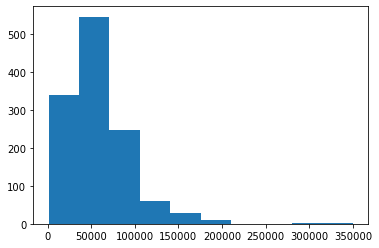

In [18]:
import matplotlib.pyplot as plt
plt.hist(df2['Kilometers_Driven'])
plt.show()

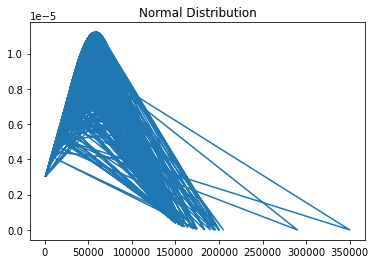

In [19]:
from scipy.stats import norm,uniform,expon
df3=df2[['Kilometers_Driven']]
mean=np.mean(df3)
sd=np.std(df3)
plt.plot(df3, norm.pdf(df3, mean, sd))
plt.title("Normal Distribution")
plt.show()

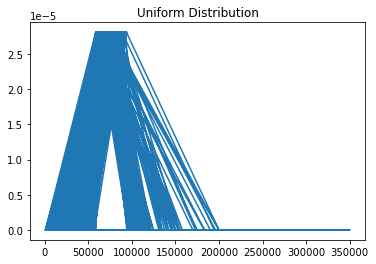

In [20]:
plt.plot(df3,uniform.pdf(df3, mean, sd))
plt.title("Uniform Distribution")
plt.show()

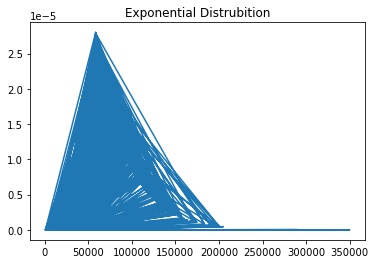

In [21]:
plt.plot(df3,expon.pdf(df3, mean, sd))
plt.title("Exponential Distrubition")
plt.show()